In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg  

Задание №1. 
Решите линейную систему

In [2]:
a = np.array([[1, 4, 7], [2, 0, 8], [3, 6, 9]])
b = np.array([12, 1, 2])


In [3]:
np.linalg.solve(a, b)

array([-8.43333333,  1.2       ,  2.23333333])

Задание №2. Найдите псевдорешение:

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15


In [4]:
a = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2],[2,0,-5],[11,4,-7]])
b=np.array([1,7,12,7,15])

In [5]:
x=np.linalg.lstsq(a,b,rcond = None)
x

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [6]:
B=a.dot(x[0])
B

array([ 0.23020495,  7.03751834, 11.83650981,  6.78328855, 15.21805313])

Задание № 3. Сколько решений имеет линейная система:


In [7]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b=np.array([[12,2,1]])

In [8]:
Arang=np.linalg.matrix_rank(a)
A_big_rang=np.linalg.matrix_rank(np.concatenate((a,b.T), axis=1))
print(Arang)
print(A_big_rang)

2
3


СЛАУ не совместна. Решений нет, поскольку ранг расшиненной матрицы не равен основной.

Изменим матрицу

In [9]:
b=np.array([[12,2,2]])

In [10]:
Arang=np.linalg.matrix_rank(a)
A_big_rang=np.linalg.matrix_rank(np.concatenate((a,b.T), axis=1))
print(Arang)
print(A_big_rang)

2
3


Изменим вектор b

In [11]:
b[0,1]=(b[0,0]+b[0,2])/2

In [12]:
b

array([[12,  7,  2]])

In [13]:
Arang=np.linalg.matrix_rank(a)
A_big_rang=np.linalg.matrix_rank(np.concatenate((a,b.T), axis=1))
print(Arang)
print(A_big_rang)

2
2


В СЛАУ бесконечно много решений, поскольку ранг основной матрицы равен рангу расширенной и он меньше количества переменных

In [14]:
print(a)
print(b.T)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[12]
 [ 7]
 [ 2]]


Решение данной системы

y= 9-2*z

x= -10+z

z - любое число

Задание 4. Вычислите LU-разложение матрицы:

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [15]:
a = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])

In [16]:
P, L, U = scipy.linalg.lu(a)

In [17]:
print(P)
print(L)
print(U)


[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [18]:
c=P.T@a
c

array([[ 4., 28., 73.],
       [ 1.,  2.,  3.],
       [ 2., 16., 21.]])

In [19]:
c-L@U

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
P.T@a

array([[ 4., 28., 73.],
       [ 1.,  2.,  3.],
       [ 2., 16., 21.]])

In [21]:
# Придумаем вектор правых частей (это вектор для переставленнойм атрицы с),для матрицы а вектор B
b=np.array([12,2,1])
B=P@b
B

array([ 2.,  1., 12.])

Пусть UX=Y, тогда LY=B

In [22]:
L

array([[ 1.  ,  0.  ,  0.  ],
       [ 0.25,  1.  ,  0.  ],
       [ 0.5 , -0.4 ,  1.  ]])

In [23]:
y0=12

In [24]:
y1=2-0.25*12
y1

-1.0

In [25]:
y2=1-12*0.5-(-0.4*(-1))
y2

-5.4

In [26]:
U

array([[  4.  ,  28.  ,  73.  ],
       [  0.  ,  -5.  , -15.25],
       [  0.  ,   0.  , -21.6 ]])

In [27]:
x2=-5.4/(-21.6)
x2

0.25

In [28]:
x1=(-1 -0.25*(-15.25))/(-5)
x1

-0.5625

In [29]:
x0=(12-28*(-0.5625)-73*0.25)/4
x0

2.375

In [30]:
np.linalg.solve(c, b)

array([ 2.375 , -0.5625,  0.25  ])

In [31]:
np.linalg.solve(a, B)

array([ 2.375 , -0.5625,  0.25  ])

Домашнее задание № 5

найдите нормальное псевдорешение системы

x+2y−z=1

8x−5y+2z=12

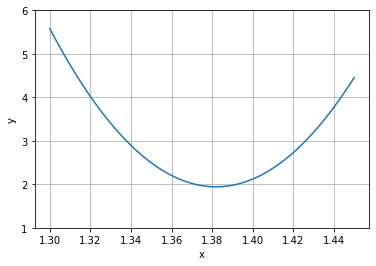

In [32]:

def Q(x, y,z):
    return (x**2 + y**2 + z**2)

x = np.linspace(1.3, 1.45, 201)
plt.plot(x, Q(x, (10*x-14),(21*x-29)))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(1,6)
plt.grid(True)
plt.show()

In [33]:
A = np.array([[1, 2,-1],[8,-5,2]])
B = np.array([1,12])
np.linalg.lstsq(A, B,rcond=None)

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

Задание 6.
Найдите одно из псевдорешений вырожденной системы:


In [41]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B=np.array([2,5,11])

In [38]:
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [39]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [42]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.43769499e-15])

In [43]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.32822279e-15])

In [45]:
X = np.append(X1, 0)
X


array([1.50000000e+00, 9.32822279e-15, 0.00000000e+00])